# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.metrics import ( 
    mean_absolute_error,
    make_scorer,
    mean_absolute_percentage_error
)
from sklearn.preprocessing import (
    StandardScaler
)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV
)
from sklearn import metrics

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
print(df_train.info())
display(df_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
print(df_test.info())
display(df_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
print(df_full.info())
display(df_full.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


**Выводы**

- в столбце date тип данных - object
- в df_test 53 столбца, а в df_train и df_full 87 столбцов
- во всех датасетах есть пропуски

In [6]:
df_train['rougher.output.recovery_new'] = (
    df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au']) /
    (df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'])) * 100
)

df = df_train[['rougher.output.recovery', 'rougher.output.recovery_new']].dropna()
mae = mean_absolute_error(df['rougher.output.recovery'],df['rougher.output.recovery_new'])
mae

9.73512347450521e-15

**Выводы:**

- показатель mae показывает что эффективность обогащения расчитана верно т.е. очень малое отклонение

In [7]:
columns_lost = []
for i in list(df_full.columns):
    if i not in list(df_test.columns):
        columns_lost.append(i)
        
columns_lost        

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

**Выводы**

- посмотрели какие столбцы отсутвуют в тестовом датасете

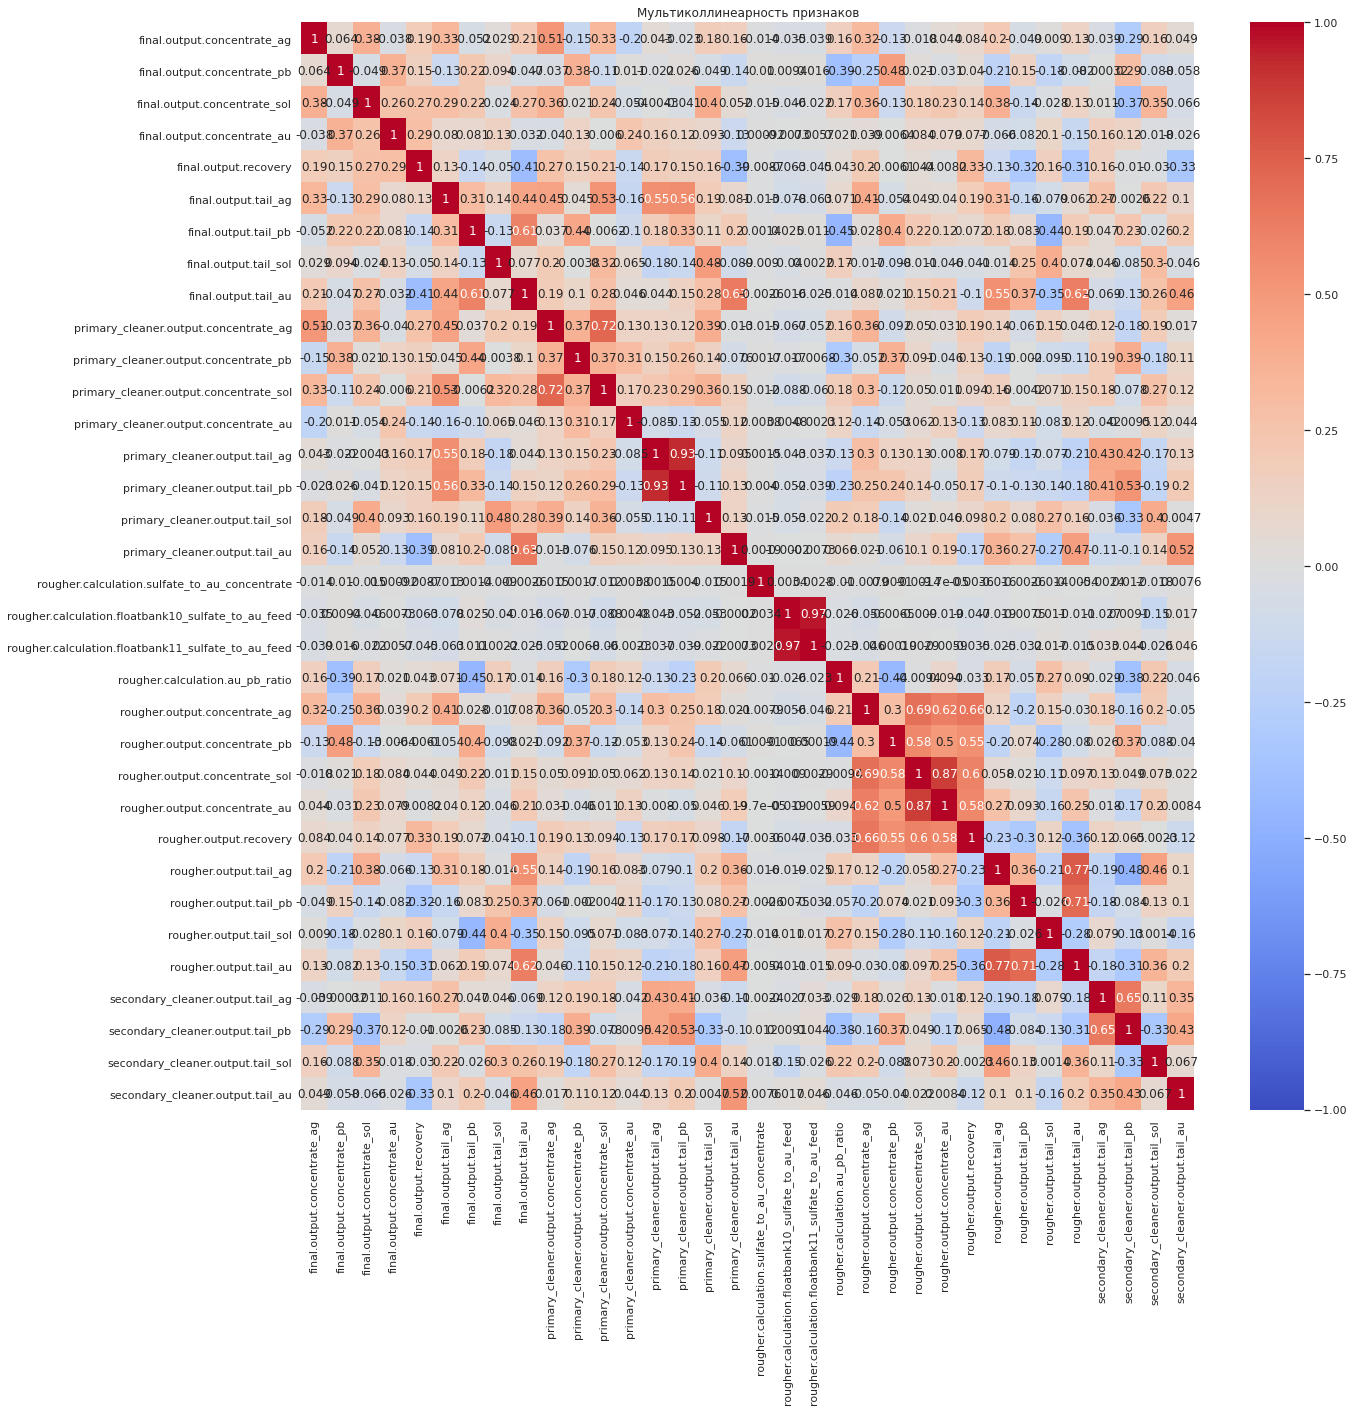

In [8]:
sns.set(rc={'figure.figsize': (20,20)})
sns.heatmap(df_full[columns_lost].corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.title('Мультиколлинеарность признаков')
plt.show()

**Выводы**

в тестовом датасете отсутствуют следующие данные:

1. - конечный результат
 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au' 
2. - этап первой очистки
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au'
3. - этап флотации
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'rougher.output.tail_au'
4. - этап второй очитски
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au'

In [9]:
def date_time(df):
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M:%S')
    df = df.sort_values(ascending=True, by='date')
    return df

list_df = [df_train, df_test, df_full]

for i in list_df:
    date_time(i)
    print(i['date'].head(5)) 
    print('')



0   2016-01-15 00:00:00
1   2016-01-15 01:00:00
2   2016-01-15 02:00:00
3   2016-01-15 03:00:00
4   2016-01-15 04:00:00
Name: date, dtype: datetime64[ns]

0   2016-09-01 00:59:59
1   2016-09-01 01:59:59
2   2016-09-01 02:59:59
3   2016-09-01 03:59:59
4   2016-09-01 04:59:59
Name: date, dtype: datetime64[ns]

0   2016-01-15 00:00:00
1   2016-01-15 01:00:00
2   2016-01-15 02:00:00
3   2016-01-15 03:00:00
4   2016-01-15 04:00:00
Name: date, dtype: datetime64[ns]



In [10]:
df_test = (
    df_test.merge(
    df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
    on='date'
    )
)

- привели к формату datetime столбец date 
- в датасет df_test добавили целевые признаки 'rougher.output.recovery', 'final.output.recovery' из df_full

In [11]:
df_full.isnull().sum().sort_values().head(30)

date                                          0
rougher.state.floatbank10_f_level             0
rougher.output.concentrate_pb                 0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_d_air               0
secondary_cleaner.output.tail_au              0
rougher.output.tail_au                        0
rougher.input.feed_ag                         0
rougher.output.tail_sol                       0
rougher.output.tail_pb                        0
rougher.output.recovery                       0
rougher.input.feed_au                         0
rougher.output.concentrate_au                 0
rougher.calculation.au_pb_ratio               0
primary_cleaner.output.concentrate_au         0
primary_cleaner.output.tail_au                0
rougher.output.concentrate_ag                 0
primary_cleaner.output.concentrate_ag         0
primary_cleaner.input.feed_size         

- посмотрели пропуски в в датасете df_full на предмет кол-во

In [12]:
for i in [df_test, df_train]:
    i = i.dropna(subset=['rougher.output.recovery','final.output.recovery'])
    print(i[['rougher.output.recovery', 'final.output.recovery']].isnull().sum().sort_values().head())

rougher.output.recovery    0
final.output.recovery      0
dtype: int64
rougher.output.recovery    0
final.output.recovery      0
dtype: int64


- удаляем пропуски по целевым признакам 'rougher.output.recovery','final.output.recovery' в df_test, df_train

**Результаты**
- проверили эффективность насыщения, расчеты показали что ошибки нет
- добавили целевые признакив в df_test из df_train
- привели столбец date к формату DateTime

## Анализ данных

**Изучим концентрацию металлов (Au, Ag, Pb) на различных этапах очистки.**

In [13]:
metal = ['au', 'ag', 'pb']
level = ['rougher.input', 'rougher.output','primary_cleaner', 'final']

metal_column = []
for col in list(df_full.columns):
    for me in metal:
        if me in col.split('_') and col.find('rougher.calculation.') == -1 and col.find('tail') == -1:
            metal_column.append(col)
        
metal_column

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_au']

- выделили в df_full столбцы где есть 'au', 'ag', 'pb' в названии на уровнях 'rougher.input', 'rougher.output','primary_cleaner', 'final'

In [14]:
df = pd.DataFrame(df_full[metal_column].mean().reset_index().set_axis(['index', 'concentration'], axis=1, inplace=False))

display(df)

,index,concentration
0,final.output.concentrate_ag,5.168470
1,final.output.concentrate_pb,9.978895
2,final.output.concentrate_au,44.076513
3,primary_cleaner.output.concentrate_ag,8.442408
4,primary_cleaner.output.concentrate_pb,9.829530
5,primary_cleaner.output.concentrate_au,32.119400
6,rougher.input.feed_ag,8.794927
7,rougher.input.feed_pb,3.598085
8,rougher.input.feed_au,8.266097
9,rougher.output.concentrate_ag,11.994759


- сформировали датасет df с средней концентрацией металлов на уровнях

In [15]:
def metal(row):
    for i in ['au', 'ag', 'pb']:
        if i in row['index']:
            return i

def levels(row):
    for i in ['rougher.input', 'rougher.output','primary_cleaner', 'final']:
        if i in row['index']:
            return i

In [16]:
df['metal'] = df.apply(metal, axis=1)
df['level'] = df.apply(levels, axis=1)
df = df.drop('index', axis=1)
df

,concentration,metal,level
0,5.168470,ag,final
1,9.978895,pb,final
2,44.076513,au,final
3,8.442408,ag,primary_cleaner
4,9.829530,pb,primary_cleaner
5,32.119400,au,primary_cleaner
6,8.794927,ag,rougher.input
7,3.598085,pb,rougher.input
8,8.266097,au,rougher.input
9,11.994759,ag,rougher.output


- произвели категоризализациюб, выделив отдельно уровень и метал в отдельные столбцы

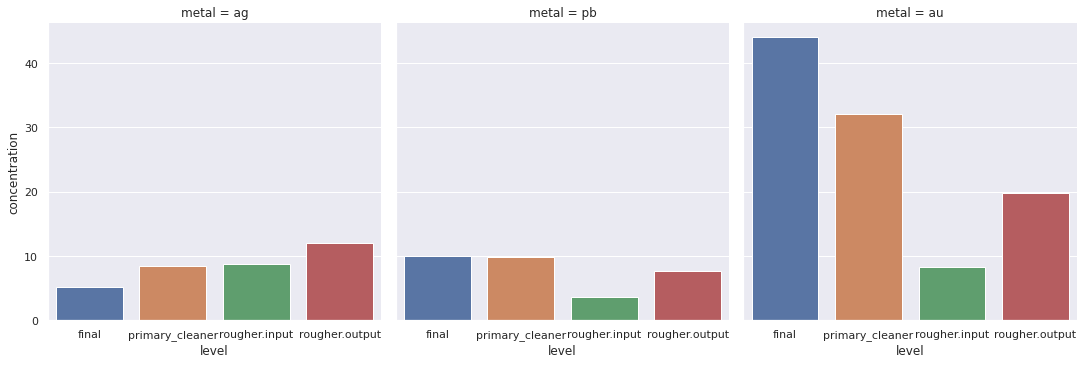

In [17]:
sns.catplot(data=df, kind='bar',x='level', y='concentration', col='metal')

- гиистограммы показывают что:
1. концетрация au ростет на каждом уровне очистки
2. концентрация ag падает на каждом уровне очистки
3. концентрация pb ростет к финальному уроню очистки

**Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.**

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


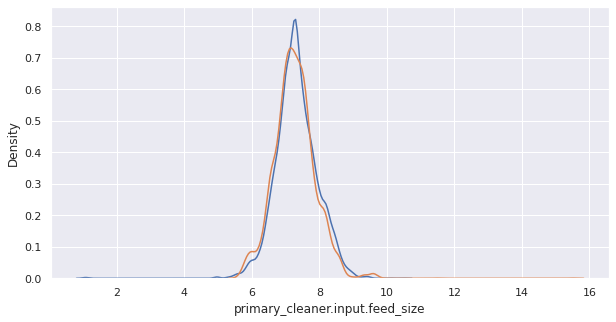

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


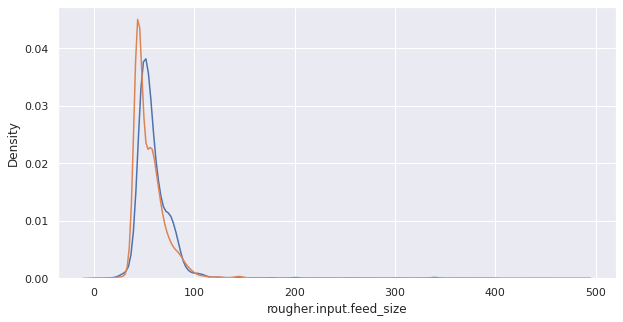

In [18]:
feed_size = []

for i in list(df_full.columns):
    if i.find('feed_size') != -1:
        feed_size.append(i)
        
sns.set(rc={'figure.figsize':(10,5)})
        
for col in feed_size:
    sns.distplot(df_train[col], bins=200, kde=True, hist=False)
    sns.distplot(df_test[col], bins=200, kde=True, hist=False)
    plt.show()    

- Размер гранул и распределения  датасетов df_train и df_test пимерно индентичны

**Исследуем суммарную концентрацию всех веществ на разных стадиях**

In [19]:
columns_material = []
for col in list(df_full.columns):
    for i in ['au', 'pb', 'ag', 'sol']:
        if i in col.split('_') and col.find('rougher.calculation.') == -1 and col.find('tail') == -1:
            columns_material.append(col)
            
df_level = df_full[columns_material]

df_level['final'] = (
    df_level['final.output.concentrate_ag'] + 
    df_level['final.output.concentrate_au'] + 
    df_level['final.output.concentrate_pb'] +
    df_level['final.output.concentrate_sol']
)

df_level['rougher.input'] = (
    df_level['rougher.input.feed_ag'] + 
    df_level['rougher.input.feed_pb'] + 
    df_level['rougher.input.feed_au'] +
    df_level['rougher.input.feed_sol']
)

df_level['rougher.output'] = (
    df_level['rougher.output.concentrate_ag'] + 
    df_level['rougher.output.concentrate_pb'] + 
    df_level['rougher.output.concentrate_au'] +
    df_level['rougher.output.concentrate_sol']
)

df_level['primary_cleaner'] = (
    df_level['primary_cleaner.output.concentrate_ag'] + 
    df_level['primary_cleaner.output.concentrate_pb'] + 
    df_level['primary_cleaner.output.concentrate_au'] +
    df_level['primary_cleaner.output.concentrate_sol'] 
)

df_level = df_level.dropna()

df_level = df_level[level]
display(df_level)
df_level.info()


/tmp/ipykernel_48/344249843.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_level['final'] = (
/tmp/ipykernel_48/344249843.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_level['rougher.input'] = (
/tmp/ipykernel_48/344249843.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

,rougher.input,rougher.output,primary_cleaner,final
0,51.680034,66.424950,72.640924,63.644396
1,50.659114,67.012710,72.543485,63.957723
2,50.609929,66.103793,72.095042,64.311180
3,51.061546,65.752751,59.957723,63.573449
4,47.859163,65.908382,71.321010,64.004667
...,...,...,...,...
19434,53.415050,70.781325,59.001692,68.098589
19435,53.696482,70.539603,59.703912,68.274362
19436,54.589604,55.376330,59.561096,68.226068
19437,54.027355,69.201689,57.216686,68.200449


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18713 entries, 0 to 19438
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rougher.input    18713 non-null  float64
 1   rougher.output   18713 non-null  float64
 2   primary_cleaner  18713 non-null  float64
 3   final            18713 non-null  float64
dtypes: float64(4)
memory usage: 731.0 KB


- сформировали датасет df_level с данными суммарной концетрации по всем уровням(стадиям) тех процесса

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

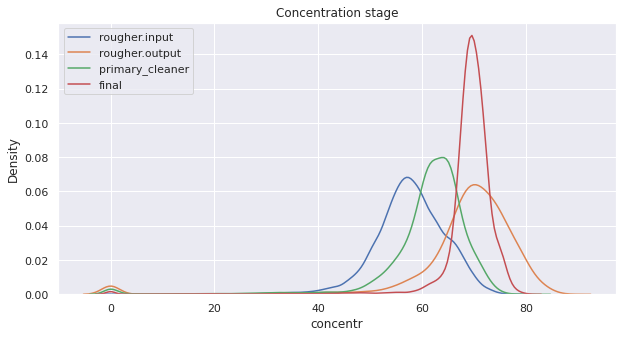

In [20]:
for col in level:
    sns.distplot(df_level[col], bins=100, kde=True, hist=False, label=col)
plt.xlabel('concentr')
plt.legend()
plt.title('Concentration stage')
plt.show() 

- концентрация материалов на final стадии тех процесса примерно в больше в 2 раза

**Выводы:**

- Анализ показал что концетрация Au ростет по мере прохождения уровня тех процесса
- Размер гранул и распределения данных датасетов df_train и df_test пимерно индентичны

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


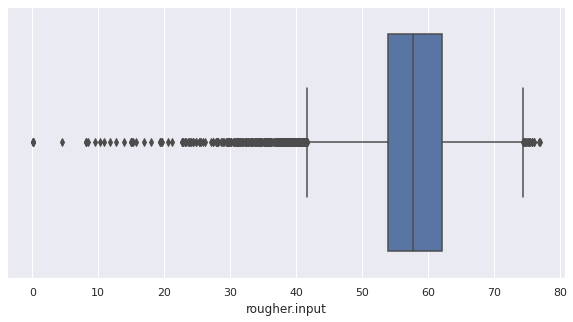

count    18713.000000
mean        57.697014
std          6.890897
min          0.040000
25%         53.937124
50%         57.789355
75%         62.136173
max         76.978947
Name: rougher.input, dtype: float64


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


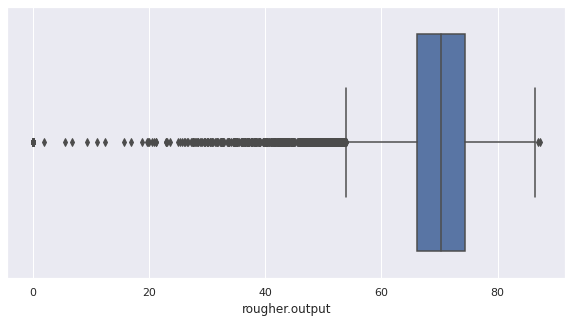

count    18713.000000
mean        68.306756
std         12.451638
min          0.000000
25%         66.181710
50%         70.261602
75%         74.394345
max         87.273435
Name: rougher.output, dtype: float64


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


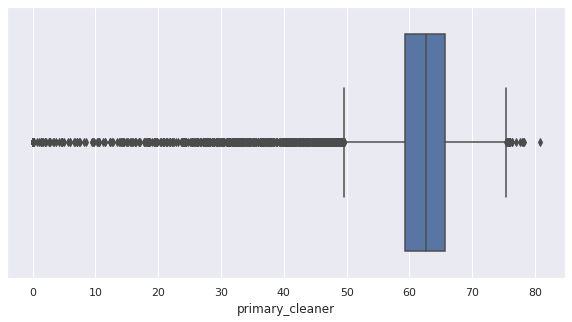

count    18713.000000
mean        61.087685
std          9.512715
min          0.000000
25%         59.244180
50%         62.624871
75%         65.702118
max         80.749343
Name: primary_cleaner, dtype: float64


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


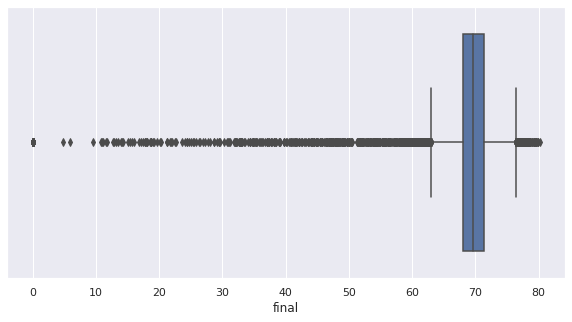

count    18713.000000
mean        69.007114
std          6.570913
min          0.000000
25%         68.079699
50%         69.681188
75%         71.427353
max         80.210644
Name: final, dtype: float64


In [21]:
for i in level:
    sns.boxplot(df_level[i])
    plt.show()
    print(df_level[i].describe())

- с помощью диаграммы размаха для каждого уровня(стадии) очистки определили наличие выбросов

In [22]:
df_level = df_level[(df_level['rougher.input'] > 20) & 
                      (df_level['rougher.output'] > 20) & 
                      (df_level['primary_cleaner'] > 20) & 
                      (df_level['final'] > 20)]

data = df_full.loc[df_level.index]['date']

df_train = df_train.query('date in @data')
df_test = df_test.query('date in @data')


<br/>    
<div class="alert alert-info">

Произвели дополнительно анализ на выбросы и очистили df_train и df_test от выбросов
    
</div> 

<br/> 

## Модель

In [23]:
# удаляем пропуски в датасетах
df_train = df_train.dropna()
df_test = df_test.dropna()

# Сформировали признаки и целевые признаки  для df_train
features_train = df_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = df_train['rougher.output.recovery']
target_train_final = df_train['final.output.recovery']


# Сформировали признаки и целевые признаки  для df_test
features_test = df_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher = df_test['rougher.output.recovery']
target_test_final = df_test['final.output.recovery']

# приводим к одинаковому кол-ву признаков в датасетах features_train и features_test
features_train = features_train[features_test.columns]


In [24]:
numeric = features_train.columns
scaler = StandardScaler()

features_train[numeric] = scaler.fit_transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

# производим маштабирование признаков

**LinearRegression**

In [25]:
def total_smape(rougher_smape, final_smape):
    return 0.25 * rougher_smape + 0.75 * final_smape
# функция определения итогового smape

def smape(true, predict):
    true=np.array(true)
    predict=np.array(predict)
    total = 0
    for i in range(len(true)):
        total += abs(true[i] - predict[i]) / ((abs(true[i]) + abs(predict[i]))/2)
    return total*100 / len(true)
# функция определения smape по формуле в задании

In [26]:


smape_score_rougher = (cross_val_score(LinearRegression(), features_train, target_train_rougher, scoring=make_scorer(smape, greater_is_better= False ), cv=5)).mean()
smape_score_final = (cross_val_score(LinearRegression(), features_train, target_train_final, scoring=make_scorer(smape, greater_is_better= False ), cv=5)).mean()

print(f'Итоговое smape : {total_smape(smape_score_rougher, smape_score_final)}')

Итоговое smape : -8.436740631578763


**DecisionTreeRegressor**

In [27]:
params = {
    'max_depth': range(1,10),
    'min_samples_leaf': range(1,10),
    'min_samples_split': range(2,11)
}

grid = GridSearchCV(DecisionTreeRegressor(random_state=12345), params, scoring=make_scorer(smape, greater_is_better= False), cv=5)
grid_rougher = grid.fit(features_train, target_train_rougher)
print('rougher best param: {}'.format(grid_rougher.best_params_))
smape_rougher = grid_rougher.best_score_

grid = GridSearchCV(DecisionTreeRegressor(random_state=12345), params, scoring=make_scorer(smape, greater_is_better= False ), cv=5)
grid_final = grid.fit(features_train, target_train_final)
print('final best param: {}'.format(grid_final.best_params_))
smape_final = grid_final.best_score_

print('Итоговый sMAPE:', total_smape(smape_rougher, smape_final))

rougher best param: {'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 2}
final best param: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Итоговый sMAPE: -7.646234335708385


**RandomForestRegressor**

In [29]:
params = {
    'n_estimators': np.arange(11, 41, 10),
    'max_depth': np.arange(1, 10),
}

grid = GridSearchCV(RandomForestRegressor(random_state=12345), params, scoring=make_scorer(smape, greater_is_better= False ), cv=5)
grid_rougher = grid.fit(features_train, target_train_rougher)
print('rougher best param: {}'.format(grid_rougher.best_params_))
smape_rougher = grid_rougher.best_score_

grid = GridSearchCV(RandomForestRegressor(random_state=12345), params, scoring=make_scorer(smape, greater_is_better= False ), cv=5)
grid_final = grid.fit(features_train, target_train_final)
print('final best param: {}'.format(grid_final.best_params_))
smape_final = grid_final.best_score_

print('Итоговый sMAPE:', total_smape(smape_rougher, smape_final))

rougher best param: {'max_depth': 5, 'n_estimators': 31}
final best param: {'max_depth': 1, 'n_estimators': 31}
Итоговый sMAPE: -7.516689237340342


**Проверка на адекватность**

In [31]:
sanity_check = pd.Series([target_train_rougher.mean() for i in range(len(target_train_rougher))])
smape_rougher = smape(target_train_rougher, sanity_check)

sanity_check = pd.Series([target_train_final.mean() for i in range(len(target_train_final))])
smape_final = smape(target_train_final, sanity_check)

print('Итоговый sMAPE:', total_smape(smape_rougher, smape_final))

Итоговый sMAPE: 8.427899841746985


**Финальная проверка на тестовой выборке**

In [33]:
model = RandomForestRegressor(max_depth=5, n_estimators=31, random_state=12345)
model.fit(features_train, target_train_rougher)
predicted = model.predict(features_test)
smape_rought = smape(target_test_rougher, predicted)

model = RandomForestRegressor(max_depth=1, n_estimators=31, random_state=12345)
model.fit(features_train, target_train_final)
predicted = model.predict(features_test)
smape_final = smape(target_test_final, predicted)

print('Итоговое sMAPE:', total_smape(smape_rougher, smape_final))

Итоговое sMAPE: 7.489353045577115


**Вывод**

- Провели анализ по трем моделям  LR, DT и RFR где в качестве метрики использовали sMAPE(симметричное среднее абсолютное процентное отклонение).
- Целевой показатель total smape самый лучший был получен на модели RFR = 7.489353045577115 на тестовой выборке
- Проверка на адекватность показала что наша модель RFR  лучше предсказывает, чем констатная (проверка на адекватность) 